In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft, rfftfreq
from accelerate.mkl.fftpack import rfft, irfft
from scipy.signal import firwin2, filtfilt, freqs
%matplotlib inline

In [2]:
np.random.seed(123456)
rate = 400
n = int(1.29*rate)*10
nyquist = rate/2.
fs = rfftfreq(n, 1./rate)

sig = np.random.randn(n)

In [4]:
notch = 60
n_taps = 1001
gain = [1., 1., 0., 0., 1., 1.]
freq = np.array([0, notch-1, notch-.5,
                 notch+.5, notch+1, nyquist]) / nyquist
b_direct = firwin2(n_taps, freq, gain)
a_direct = np.ones_like(b_direct)
w_direct, resp_direct = freqs(b_direct, a_direct, worN=fs)

sig_direct = signal.filtfilt(b_direct, a_direct, sig, method="gust")

/home/jesse/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:681: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]
/home/jesse/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:681: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


/home/jesse/anaconda/lib/python2.7/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


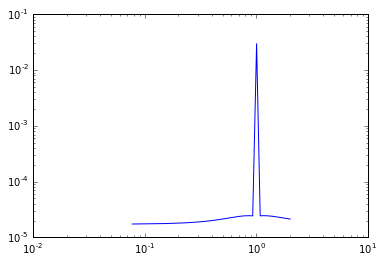

In [6]:
plt.loglog(w_direct, abs(resp_direct))

In [7]:
abs(resp_direct)

array([  1.73265652e-05,   1.74352475e-05,   1.77595050e-05, ...,
                    nan,              nan,              nan])

In [22]:
delta = 1
window_mask = np.logical_and(fs > notch-delta, fs < notch+delta)
window_size = window_mask.sum()
window = np.hamming(window_size)
fd = rfft(sig)
fd[window_mask] = fd[window_mask] * (1.-window)
sig_fft = irfft(fd)

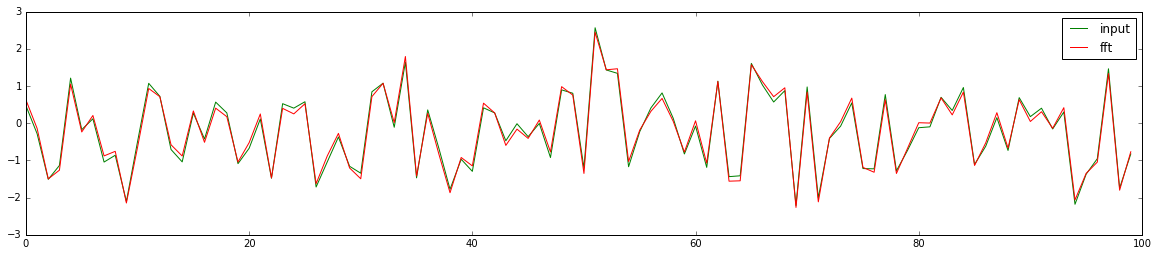

In [23]:
sl = slice(0, 100)
plt.figure(figsize=(20, 4))
plt.plot(sig[sl], 'g-', label='input')
#plt.plot(sig_direct, 'b-', label='direct')
plt.plot(sig_fft[sl], 'r-', label='fft')
plt.legend(loc='best')
plt.show()

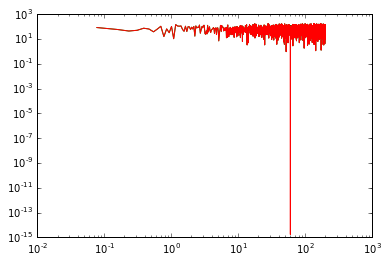

In [24]:
plt.loglog(fs, abs(rfft(sig)), 'g-', label='input')
#plt.loglog(fs, abs(rfft(sig_direct)), 'b-', label='direct')
plt.loglog(fs, abs(rfft(sig_fft)), 'r-', label='fft')